In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# QQ-Plots

In [ ]:
income = df['Income'].values
income_t = df.loc[df.Group=='treatment', 'Income'].values
income_c = df.loc[df.Group=='control', 'Income'].values

df_pct = pd.DataFrame()
df_pct['q_treatment'] = np.percentile(income_t, range(100))
df_pct['q_control'] = np.percentile(income_c, range(100))

plt.figure(figsize=(8, 8))
plt.scatter(x='q_control', y='q_treatment', data=df_pct, label='Actual fit');
sns.lineplot(x='q_control', y='q_control', data=df_pct, color='r', label='Line of perfect fit');
plt.xlabel('Quantile of income, control group')
plt.ylabel('Quantile of income, treatment group')
plt.legend()
plt.title("QQ plot");

## t-test

In [ ]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(income_c, income_t)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")
t-test: statistic=-1.5549, p-value=0.1203

## Statsmodel:
https://www.statsmodels.org/stable/api.html

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd


## Clustered Standard Errors

(source: https://towardsdatascience.com/clustered-standard-errors-in-ab-tests-a993f29b9225)

What’s the problem with the standard errors reported in the linear regression table?

The problem is that the usual formula to compute standard errors in linear regression (more on the math later) assumes that observations are independent and identically distributed, i.i.d.. However, in our case, the independence assumption is not satisfied. Why?

In our example, the unit of treatment assignment, a customer is different from the unit of observation, an order. This is a problem because, under different treatment assignments, all orders of a certain customer are either treated or not. They move in blocks and it cannot happen that two orders of the same customer are split across control and treatment groups. The consequence of orders "moving in blocks" is that there is more variability in our estimates than we might have if orders were moving independently. Intuitively, there is less balance between the two groups, on average. As a consequence, standard errors computed assuming independence typically **underestimate** the actual variability of the estimator.

Is there a solution? Yes!

The solution is to use the so-called **cluster-robust standard errors** that allow observations to be correlated within a cluster of observations, a customer in our case. Cluster-robust standard errors are usually very simple to implement and available in all statistical packages. With statsmodels we have to specify that the covariance type is cluster and that the groups are by customer.



In [ ]:
smf.ols("revenue ~ carousel", data=df).fit(cov_type='cluster', cov_kwds={'groups': df["customer_id"]}).summary().tables[1]


We can now compute the estimated standard errors under intra-cluster correlation.

In [ ]:
customer_id = df[["customer_id"]].values
Sigma = (customer_id == customer_id.T) * (e @ e.T)
np.sqrt(inv(X.T @ X) @ X.T @ Sigma @ X @ inv(X.T @ X))[1,1]


# Pandas

In [ ]:
pd.get_dummies(df["carousel"])

# Scikit-Learn
https://scikit-learn.org/stable/

In [ ]:
import sklearn.linear_model as lm

In [ ]:
lm.LogisticRegression().fit()

## Decision trees
https://scikit-learn.org/stable/modules/tree.html

from sklearn import tree


### 1- Regression trees
from sklearn.tree import DecisionTreeRegressor

### 2- Classification trees
clf = tree.DecisionTreeClassifier()




In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2).fit(df[X], df['y_star'])
df['y_hat'] = tree.predict(df[X])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate the dataset
np.random.seed(42)
num_customers = 1000

# Generate data
data = {
    "CustomerID": np.arange(1, num_customers + 1),
    "Age": np.random.randint(18, 70, size=num_customers),
    "Gender": np.random.choice(["Male", "Female"], size=num_customers),
    "ProductCategory": np.random.choice(["Electronics", "Clothing", "Groceries", "Furniture"], size=num_customers),
    "FeedbackScore": np.random.choice([1, 2, 3, 4, 5], size=num_customers, p=[0.1, 0.2, 0.4, 0.2, 0.1]),
    "PurchaseAmount": np.random.gamma(2, 50, size=num_customers).round(2),
    "Region": np.random.choice(["North", "South", "East", "West"], size=num_customers),
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 2: Perform Exploratory Data Analysis (EDA)
summary = df.describe(include="all")

# Display summary
print("EDA Summary:")
print(summary)


EDA Summary:
         CustomerID         Age Gender ProductCategory  FeedbackScore  \
count   1000.000000  1000.00000   1000            1000    1000.000000   
unique          NaN         NaN      2               4            NaN   
top             NaN         NaN   Male        Clothing            NaN   
freq            NaN         NaN    524             259            NaN   
mean     500.500000    43.81900    NaN             NaN       2.988000   
std      288.819436    14.99103    NaN             NaN       1.094099   
min        1.000000    18.00000    NaN             NaN       1.000000   
25%      250.750000    31.00000    NaN             NaN       2.000000   
50%      500.500000    44.00000    NaN             NaN       3.000000   
75%      750.250000    56.00000    NaN             NaN       4.000000   
max     1000.000000    69.00000    NaN             NaN       5.000000   

        PurchaseAmount Region  
count      1000.000000   1000  
unique             NaN      4  
top           

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris(as_frame=True)
df = iris['data']
df['Species'] = iris['target'].map(dict(zip(range(3), iris['target_names'])))

# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(df.head())

# Step 1: Simple Random Sampling
random_sample = df.sample(frac=0.2, random_state=42)  # 20% random sample
print("\nSimple Random Sample (20% of data):")
print(random_sample['Species'].value_counts())

# Step 2: Stratified Sampling
# Ensure balanced representation across species
stratified_sample = (
    df.groupby('Species', group_keys=False)
    .apply(lambda x: x.sample(frac=0.2, random_state=42))
)

print("\nStratified Sample (20% of data from each species):")
print(stratified_sample['Species'].value_counts())



First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Simple Random Sample (20% of data):
Species
virginica     11
setosa        10
versicolor     9
Name: count, dtype: int64

Stratified Sample (20% of data from each species):
Species
setosa        10
versicolor    10
virginica     10
Name: count, dtype: int64


<ipython-input-4-9561030020ea>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.2, random_state=42))


In [ ]:
grouped = df.groupby('Species', group_keys=False)
for group, group_df in grouped:
  print(group_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8              

In [ ]:
# Step 3: Summarize Results for Each Stratum
strata_summary = stratified_sample.groupby('Species').agg({
    'sepal length (cm)': ['mean', 'median'],
    'sepal width (cm)': ['mean', 'std'],
    'petal length (cm)': ['mean', 'std'],
    'petal width (cm)': ['mean', 'std']
})

print("\nSummary Statistics for Each Stratum:")
print(strata_summary)


Summary Statistics for Each Stratum:
           sepal length (cm)        sepal width (cm)            \
                        mean median             mean       std   
Species                                                          
setosa                  4.97   5.05             3.40  0.382971   
versicolor              5.85   5.75             2.70  0.221108   
virginica               6.64   6.55             2.96  0.452647   

           petal length (cm)           petal width (cm)            
                        mean       std             mean       std  
Species                                                            
setosa                  1.47  0.149443             0.23  0.094868  
versicolor              4.08  0.509466             1.22  0.147573  
virginica               5.52  0.592171             2.01  0.260128  


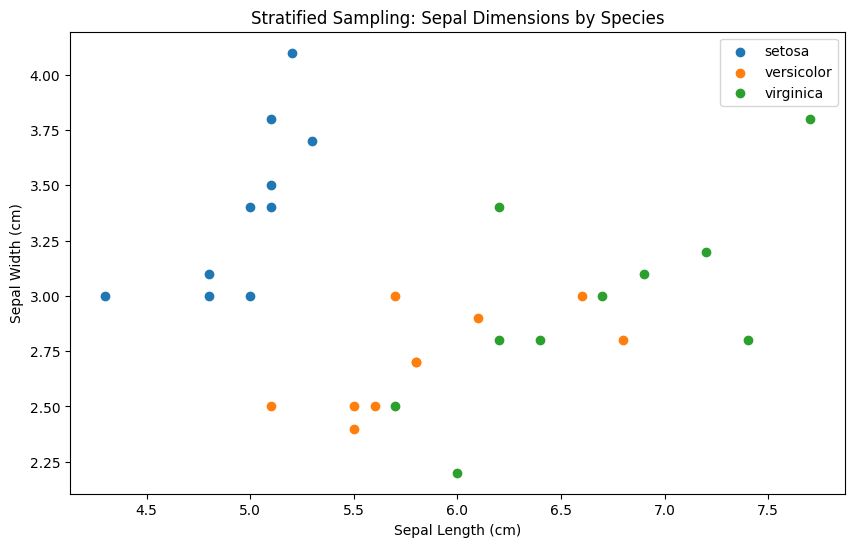

In [ ]:
# Step 4: Visualize Stratified Sampling Results
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    subset = stratified_sample[stratified_sample['Species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species)

plt.title('Stratified Sampling: Sepal Dimensions by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

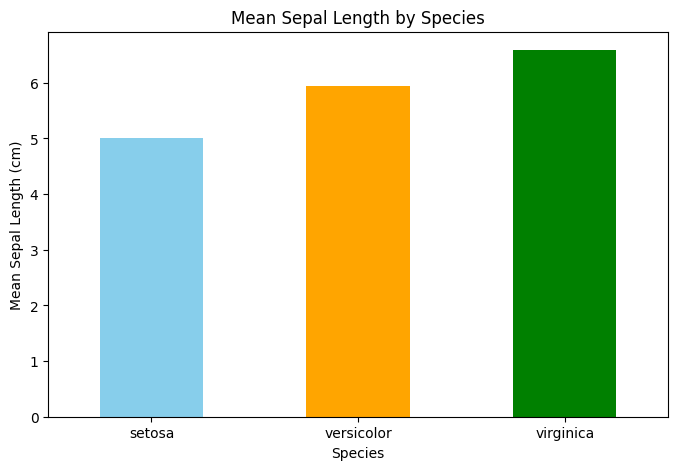

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Bar graph showing mean sepal length by species
mean_sepal_length = df.groupby('Species')['sepal length (cm)'].mean()

plt.figure(figsize=(8, 5))
mean_sepal_length.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Mean Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Mean Sepal Length (cm)')
plt.xticks(rotation=0)
plt.show()


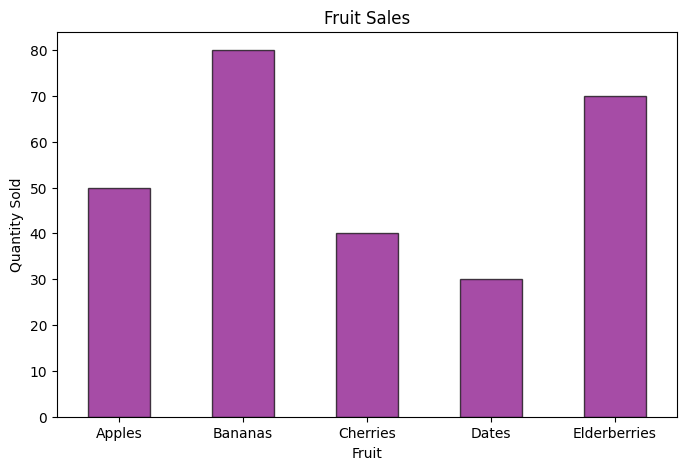

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a pandas Series
data = {
    "Apples": 50,
    "Bananas": 80,
    "Cherries": 40,
    "Dates": 30,
    "Elderberries": 70
}
fruit_series = pd.Series(data)

# Plot the Series as a bar chart
plt.figure(figsize=(8, 5))
fruit_series.plot(kind='bar', color='purple', alpha=0.7, edgecolor='black')
plt.title("Fruit Sales")
plt.xlabel("Fruit")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=0)
plt.show()


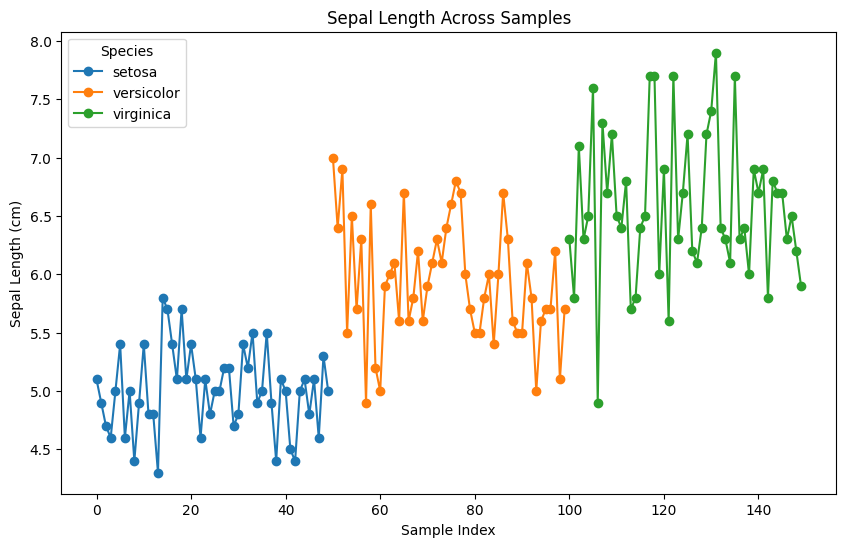

In [ ]:
# Example: Line plot of sepal length for each species (sampled data)
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.plot(subset['sepal length (cm)'], label=species, marker='o', linestyle='-')

plt.title('Sepal Length Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.legend(title='Species')
plt.show()


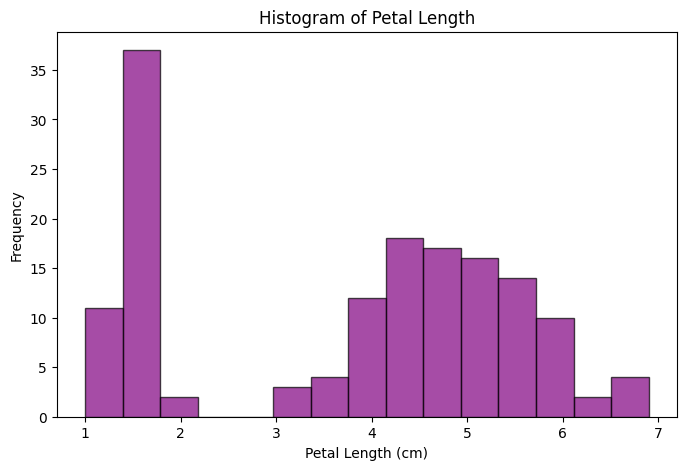

In [ ]:
# Example: Histogram of petal length
plt.figure(figsize=(8, 5))
plt.hist(df['petal length (cm)'], bins=15, color='purple', alpha=0.7, edgecolor='black')
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()


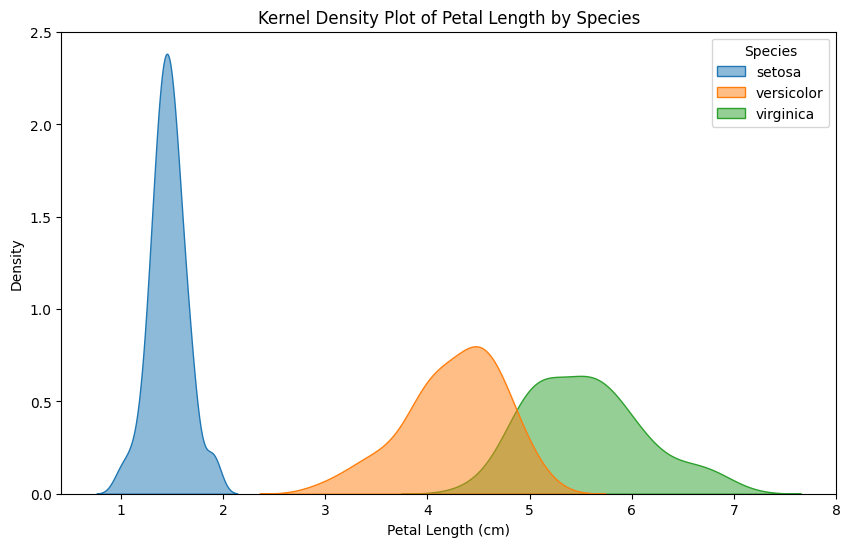

In [ ]:
# Example: Kernel Density Estimation (KDE) of petal length by species
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='petal length (cm)', hue='Species', fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot of Petal Length by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')
plt.show()


# Combining Graphs

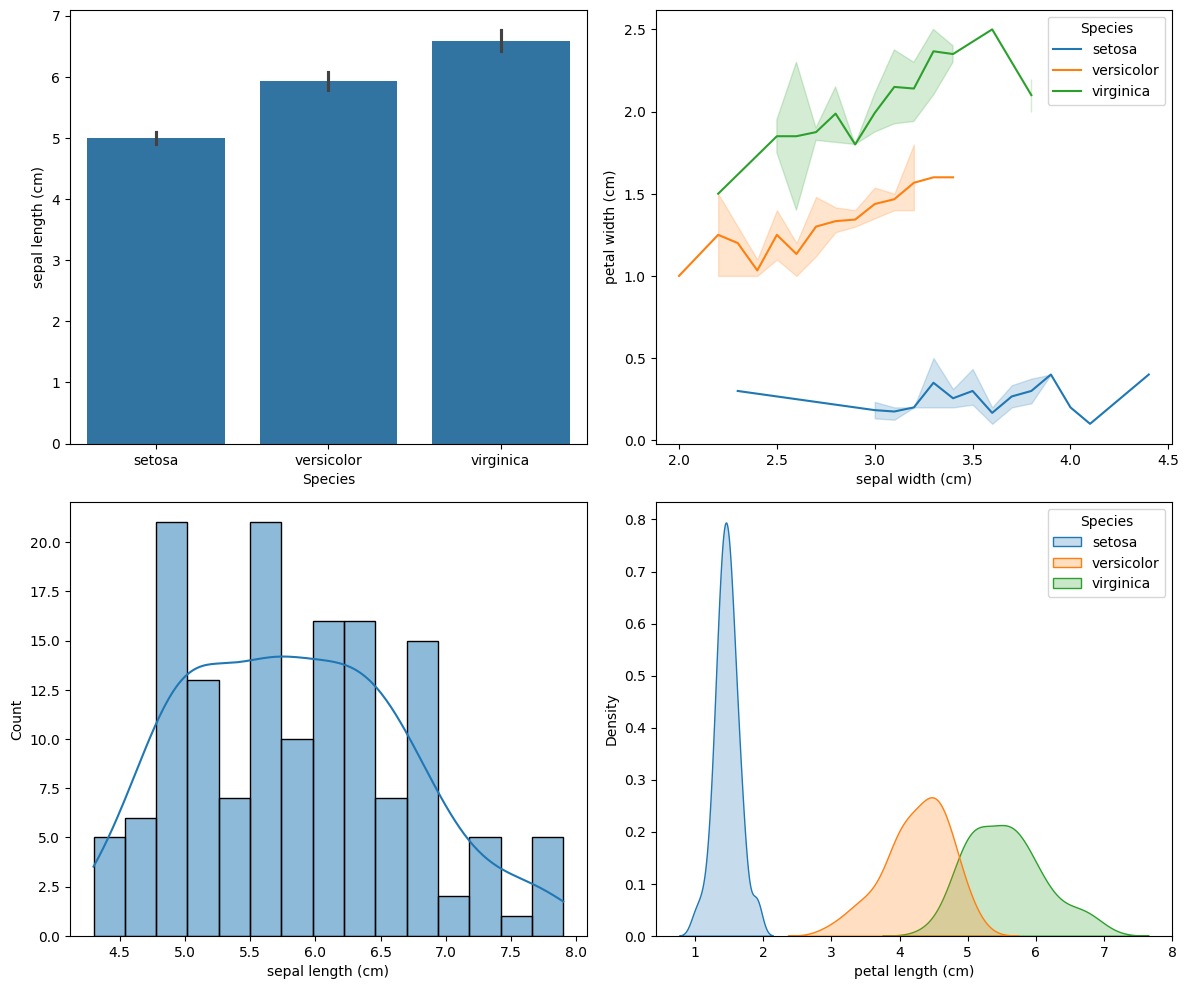

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.barplot(x='Species', y='sepal length (cm)', data=df, ax=axes[0, 0])
sns.lineplot(x='sepal width (cm)', y='petal width (cm)', hue='Species', data=df, ax=axes[0, 1])
sns.histplot(df['sepal length (cm)'], bins=15, kde=True, ax=axes[1, 0])
sns.kdeplot(data=df, x='petal length (cm)', hue='Species', fill=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()


## T test using ttest_ind from scipy.stats

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris(as_frame=True)
df = iris['data']
df['Species'] = iris['target'].map(dict(zip(range(3), iris['target_names'])))

# Separate data for two species: setosa and versicolor
setosa_petal_length = df[df['Species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = df[df['Species'] == 'versicolor']['petal length (cm)']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(setosa_petal_length, versicolor_petal_length, equal_var=False)

# Print the results
print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: The mean petal length of setosa and versicolor are significantly different.")
else:
    print(f"Since the p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in mean petal length between setosa and versicolor.")


Two-Sample T-Test Results:
T-Statistic: -39.4927
P-Value: 0.0000
Since the p-value (0.0000) < alpha (0.05), we reject the null hypothesis.
Conclusion: The mean petal length of setosa and versicolor are significantly different.
